<a href="https://colab.research.google.com/github/ATIK2110018/deep-learning/blob/main/project_2_image_recoginition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install kaggle

In [30]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [31]:
!kaggle competitions download -c cifar-10

 95% 683M/715M [00:06<00:00, 100MB/s] 
100% 715M/715M [00:06<00:00, 110MB/s]


In [32]:
from zipfile import ZipFile
file_name = "/content/cifar-10.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [33]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [34]:
#the file extension is 7Z so we have the extract the file another way

In [36]:
!pip install py7zr -q

In [37]:
import py7zr

In [39]:
archive=py7zr.SevenZipFile('/content/train.7z','r')
archive.extractall() #archive.extractall(path="")
archive.close()

In [40]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [41]:
# first we will make a basic cnn  model by us and then we will use a pretrained model

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [51]:
filename=os.listdir("/content/train")

In [52]:
len(filename)

50000

In [53]:
filename[0:5]

['14835.png', '36814.png', '29937.png', '43653.png', '7600.png']

In [54]:
#here the file name are consist of id of the image  like id.png

# labels processing

In [47]:
label=pd.read_csv('/content/trainLabels.csv')

In [48]:
label.shape

(50000, 2)

In [49]:
label.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [58]:
label[label['id']== 10]

,id,label
9,10,cat


In [59]:
label['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [60]:
label_dictionary={'frog':0,'truck':1,'deer':2,'automobile':3,'bird':4,'horse':5,'ship':6,'cat':7,'dog':8,'airplane':9}

In [64]:
labels = [label_dictionary[i] for i in label['label']]

In [65]:
labels[0:10]

[0, 1, 1, 2, 3, 3, 4, 5, 6, 7]

In [66]:
import cv2

In [69]:
img=cv2.imread("/content/train/10.png")

In [70]:
from google.colab.patches import cv2_imshow

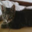

In [71]:
cv2_imshow(img)

In [85]:
id=list(label['id']) # Removed incorrect assignment

# image processing

In [86]:
train_data_folder="/content/train"
data=[]
for id in id: # Iterate over the 'id' column
  image_path=f"{train_data_folder}/{id}.png"
  print(image_path)
  if id > 5:
    break

/content/train/1.png
/content/train/2.png
/content/train/3.png
/content/train/4.png
/content/train/5.png
/content/train/6.png


In [87]:
#append means to add something in the last of a list or other data frame

In [91]:
from PIL import Image

In [94]:
train_data_folder="/content/train"
data=[]
for id in label['id']: # Iterate over the 'id' column
  image_path=f"{train_data_folder}/{id}.png"
  image=Image.open(image_path) # image=cv2.imread(image_path)
  image=np.array(image)
  data.append(image) # the images will add one after one in the data list

In [95]:
type(data)

list

In [96]:
type(data[0])

numpy.ndarray

In [97]:
data[0].shape

(32, 32, 3)

In [98]:
#convert image list and label list to numpy array

In [99]:
 x=np.array(data)
 y=np.array(labels)

In [101]:
x.shape

(50000, 32, 32, 3)

In [102]:
y.shape

(50000,)

In [103]:
# splitting data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [104]:
print(x_train.shape, x_test.shape, y_train.shape,y_test.shape)

(40000, 32, 32, 3) (10000, 32, 32, 3) (40000,) (10000,)


In [105]:
#scalling
x_train_scaled=x_train/255
x_test_scaled=x_test/255

# Building the model

In [106]:
import tensorflow as tf
from tensorflow import keras

In [112]:
num_of_classes=10

model=keras.Sequential([
    keras.Input(shape=(32, 32, 3)), # Explicit Input layer
    keras.layers.Conv2D(32,(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

In [113]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       460,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,410 (1.76 MB)

 Trainable params: 462,410 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
model.compile(
    optimizer='adam',
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [124]:
model.fit(x_train_scaled,y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3555 - loss: 1.8002 - val_accuracy: 0.5150 - val_loss: 1.3415
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5549 - loss: 1.2741 - val_accuracy: 0.5645 - val_loss: 1.2200
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6061 - loss: 1.1397 - val_accuracy: 0.5872 - val_loss: 1.1662
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6293 - loss: 1.0642 - val_accuracy: 0.5985 - val_loss: 1.1441
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6556 - loss: 0.9917 - val_accuracy: 0.6135 - val_loss: 1.1028
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6709 - loss: 0.9357 - val_accuracy: 0.6175 - val_loss: 1.1342
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6982 - loss: 0.8743 - val_accuracy: 0.6240 - val_loss: 1.1177
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7109 - loss: 0.8316 - 

# ResNet50

In [127]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Optimizer

In [128]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3)) #it will drops the final layers

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [130]:
convolutional_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [134]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2))) # our image was 32 and input size is 256
model.add(layers.UpSampling2D((2,2)))  # 32*2*2*2=256
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(num_of_classes,activation='softmax'))

In [139]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [140]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ up_sampling2d_9 (UpSampling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_10 (UpSampling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_11 (UpSampling2D) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [141]:
history=model.fit(x_train_scaled,y_train,validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 466s 368ms/step - acc: 0.3160 - loss: 2.0662 - val_acc: 0.7415 - val_loss: 0.8932
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 417s 371ms/step - acc: 0.6455 - loss: 1.1089 - val_acc: 0.8633 - val_loss: 0.5389
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 416s 370ms/step - acc: 0.7822 - loss: 0.7931 - val_acc: 0.9070 - val_loss: 0.3849
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 370ms/step - acc: 0.8566 - loss: 0.5977 - val_acc: 0.9260 - val_loss: 0.2924
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 370ms/step - acc: 0.8977 - loss: 0.4694 - val_acc: 0.9275 - val_loss: 0.2785
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 369ms/step - acc: 0.9306 - loss: 0.3612 - val_acc: 0.9370 - val_loss: 0.2390
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 370ms/step - acc: 0.9500 - loss: 0.2868 - val_acc: 0.9352 - val_loss: 0.2351
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 370ms/step - acc: 0.9632 - loss: 0.2337 - val_acc: 0.9375 - val_loss: 0.2203
Epoch 9/

In [145]:
loss,accuracy =model.evaluate(x_test_scaled,y_test)
print("model_accuracy=", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - acc: 0.9433 - loss: 0.2057
model_accuracy= 0.939300000667572


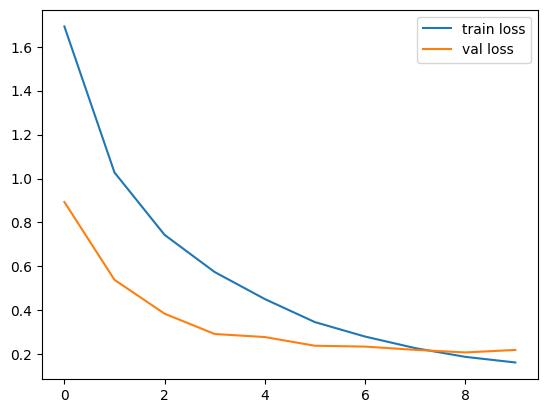

In [142]:
#plot the history
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

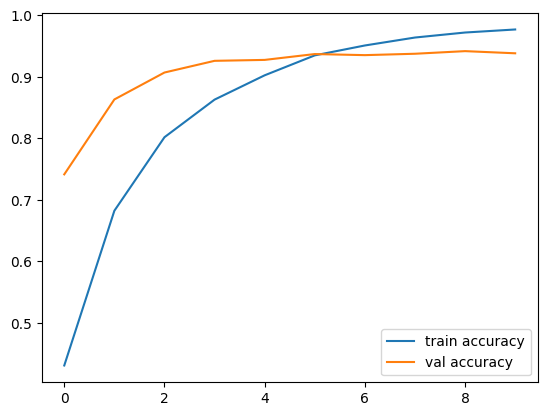

In [143]:
plt.plot(history.history['acc'], label='train accuracy')
plt.plot(history.history['val_acc'], label='val accuracy')
plt.legend()
plt.show()